# Create all charts
---

## The data sets we used are:
* City of Austin, austin_311_service_requests.csv
* The Travis county zip codes from the US Census Bureau.
* Social/Economic census data for Austin, TX by zipcode from the US Census Bureau
* City of Austin Household statistics from the US Census Bureau.

In [3]:
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [19]:
path_311 = os.path.join('..', 'data', '311_cleaned_data_.csv')
df = pd.read_csv(path_311)
df.count()

service_request_id      275281
status_description      275281
mobile_web_status       275281
duplicate_verified      275281
override_duplicate      275281
functional_location     249932
source                  275280
closed_date             125670
updated_datetime        158982
open                    275281
closed                  275281
description             273914
agency_responsible      274720
service_name            274244
service_subtype          72326
lat                     275281
long                    275281
sap_problem_category    156983
sap_problem_type        156964
address                 274431
case_record_type        275281
district                274405
time                    275281
weekday                 275281
year                    275281
month                   275281
day                     275281
dtype: int64

### Number of 311 calls by month

* be sure to limit this to a two year period

In [ ]:
period = df[df['year']]

In [22]:
months = df.groupby('month', as_index=False)['service_request_id'].count()
months['month'] = months['month'].map(lambda x: datetime.date(1900, int(x), 1).strftime('%B'))
months

,month,service_request_id
0,January,27878
1,February,22118
2,March,24752
3,April,24603
4,May,27202
5,June,32215
6,July,30221
7,August,18028
8,September,17006
9,October,17419


<BarContainer object of 12 artists>

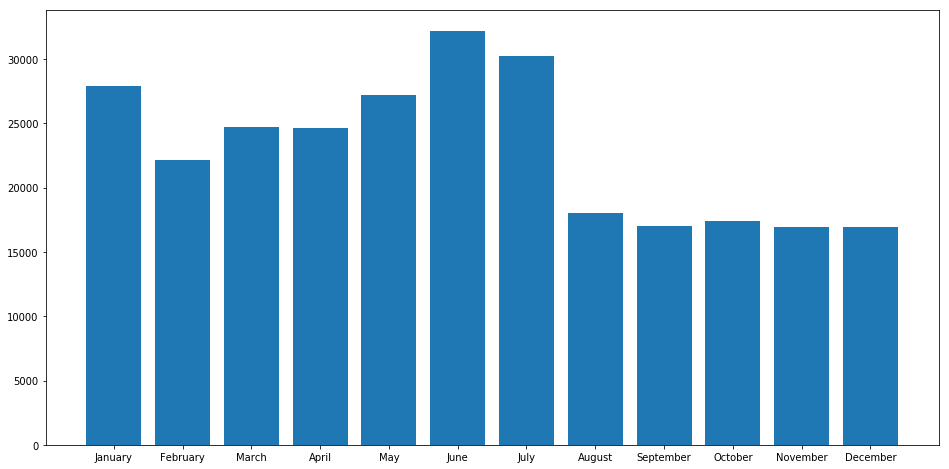

In [23]:
plt.figure(figsize=[16, 8])
plt.bar(months['month'], months['service_request_id'])

### Number of 311 calls by type

In [ ]:
service_df = df.groupby('service_name')
service = service_df['service_request_id'].sum().sort_values()
fig, ax = plt.subplots(figsize=[16, 8])
ax.bar(service.index, service)
plt.xticks(rotation='90')
''

### breakdown of percentage of call categories

### locations of callers (bubble plot?)

### Number of calls per capita by zipcode

In [5]:
pop_path = os.path.join('..', 'data', 'census_population_by_zip.csv')
pop_df = pd.read_csv(pop_path)
pop_df.head()

,zip_code,total population
0,91901,18586
1,91902,19429
2,91905,1539
3,91906,3565
4,91910,76027


### Number of calls by median household income of zip

### Number of calls by crime rate of zip

### Percent of call types by median household income (stacked bar)

### Number of calls by Temperature scatter

### Number fo calls by weekday

In [96]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', ]
weekdays = df.groupby('weekday', as_index=False)['service_request_id'].count()
weekdays['day_order'] = weekdays['weekday'].map(lambda x: days.index(x))
weekdays.sort_values('day_order', inplace=True)
weekdays

,weekday,service_request_id,day_order
1,Monday,45148,0
5,Tuesday,47993,1
6,Wednesday,46736,2
4,Thursday,43942,3
0,Friday,39692,4
2,Saturday,25782,5
3,Sunday,25988,6


<BarContainer object of 7 artists>

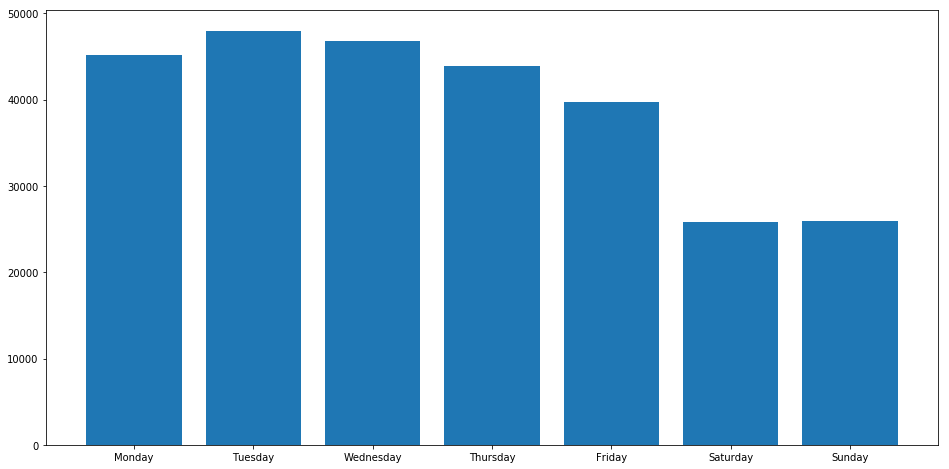

In [97]:
plt.figure(figsize=[16, 8])
plt.bar(weekdays['weekday'], weekdays['service_request_id'])